Problema De Dos Pendulos Unido Por Un Resorte.

<img src="pendulo.png"> 

Donde:

$\theta_{1}=\theta$

$\theta_{2}=\varphi$


Para poder saber el movimiento de sistema hacemos conocimiento de lagrangiano.

Esta dado por:

\begin{equation}
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial q_i}\right)=\frac{\partial L}{\partial q_i}
\end{equation}

Utilizando el lagrangiano y considerando que el movimiento es para oscilaciones pequeñas($cos\theta=1;\,sen\theta=\theta$), podemos empezar consiguiendo la expresión para nuestro lagrangiano:

\begin{equation}
L=T-U
\end{equation}


l= longitud de los péndulos.

m= masa de los péndulos.

$\theta$= ángulo de oscilación péndulo 1

$\varphi$= ángulo de oscilación péndulo 2

Para las posiciones tenemos:

\begin{equation*}
x_{1}=l\theta  \Rightarrow \, \dot{x_1}=l\dot{\theta}
\end{equation*}

\begin{equation}
x_{2}=l\varphi \Rightarrow \, \dot{x_2}=l\dot{\varphi} +l
\end{equation}

\begin{equation}
 y_1=-l \Rightarrow\, \dot{y_1}=0
\end{equation}

\begin{equation}
y_2=-l \Rightarrow \, \dot{y_2}=0
\end{equation}

calculado las energías (cinética y potencial):

\begin{equation}
T=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)
\end{equation}

\begin{equation}
U=\frac{mgl}{2}\left(\theta^2+\varphi^2\right)+\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

entonces:

\begin{equation}
L=\frac{1}{2}m\left( l^2\dot{\theta}^2\right)+\frac{1}{2}m\left( l^2\dot{\varphi}^2\right)-\frac{mgl}{2}\theta^2-\frac{mgl}{2}\varphi^2-\frac{kl^2}{2}\left(\theta-\varphi\right)^2
\end{equation}

Euler lagrange para $\theta$:

\begin{equation}
\frac{\partial L}{\partial\theta}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\theta}=-mgl\theta-kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\theta}}=ml^2\dot{\theta} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)=ml^2\ddot{\theta}
\end{equation}

\begin{equation}
\Rightarrow -mgl\theta-kl^2(\theta-\varphi)-ml^2\ddot{\theta}=0
\end{equation}

Simplificando nos queda:

\begin{equation}
\ddot{\theta}+\frac{g}{l}\theta+\frac{k}{m}(\theta-\varphi)=0
\end{equation}

Euler lagrange para $\varphi$:

\begin{equation}
\frac{\partial L}{\partial\varphi}-\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right)=0
\end{equation}

\begin{equation}
\frac{\partial L}{\partial\varphi}=-mgl\varphi+kl^2(\theta-\varphi)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial \dot{\varphi}}=ml^2\dot{\varphi} \, \Rightarrow \, \frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\varphi}}\right) = ml^2\ddot{\varphi} 
\end{equation}

\begin{equation}
\Rightarrow mgl\varphi-kl^2(\theta-\varphi)+ml^2\ddot{\varphi} =0
\end{equation}

Simplificando nos queda:

\begin{equation}
\ddot{\varphi}+\frac{y}{l}\varphi-\frac{k}{m}(\theta-\varphi)=0
\end{equation}

Simulacion Del Problema:

Codigo Hecho En La Terminal

In [10]:
from numpy import array, linspace, shape,matrix,transpose
from math import sin, cos, pi,sqrt,atan
from scipy.integrate import odeint
from vpython import  curve,box,cylinder,helix,sphere, scene, vector, color, arrow, text, sleep

#Bajando orden a la ecucaiones de trayectoria
def solucion (f,t,g,l,k,m):
    df1=f[1]
    df2=-(g/l)*f[0]-(k/m)*(f[0]-f[2])
    df3=f[3]
    df4=-(g/l)*f[2]+(k/m)*(f[0]-f[2])
    return array([df1,df2,df3,df4])
#Condiciones iniciales    
l=10
k=3
m=50
g=9.8
thetaI=5*pi/180
thetaIp=0
phiI=15*pi/180
phiIp=0
tI=0
tf=100
n=1000
t=linspace(tI,tf,n)
condINI=array([thetaI,thetaIp,phiI,phiIp])
#Solucionando la ecuacion por odenint
sol=odeint(solucion,condINI,t,args=(g,l,k,m))
xp=l*thetaI
yp=-l
zp=0
r=1


#Haciendo figura del problema
 #Esferas
pendulo1=sphere(pos=vector(xp,yp,zp),radius=r,color=color.blue)#,make_trail=True)#,trail_type="points")
pendulo2=sphere(pos=vector(xp+l,yp,zp),radius=r,color=color.red)#,make_trail=True)#,trail_type="points")

 #Cuerdas
cuerdas1=cylinder(pos=pendulo2.pos,axis=vector(0,0,0),radius=0.01,color=color.white)
cuerdas2=cylinder(pos=pendulo2.pos,axis=vector(l,0,0),radius=0.01,color=color.white)

 #Techo
base=box(pos=vector(l/2,0,0),size=vector(l+2,0.1,0.1),color=color.green)

 #Resorte 
spring=helix(pos=pendulo2.pos,axis=vector(0,0,0),radius=0.3,constant=k,thickness=0.1,coils=10,color=color.white)
#plot de la figura con saltos de 0.01
ti=0
while ti<tf:
    sleep(0.01)
    pendulo1.pos=vector(l*sol[ti,0],yp,zp)
    pendulo2.pos=vector(l*sol[ti,2]+l,yp,zp)
    cuerdas2.pos=pendulo2.pos
    cuerdas2.axis=vector(l,0,0)-cuerdas2.pos
    cuerdas1.pos=pendulo1.pos
    cuerdas1.axis=vector(0,0,0)-cuerdas1.pos
    spring.pos=pendulo1.pos
    spring.axis=pendulo2.pos-spring.pos
    ti = ti + 1


In [6]:
import numpy as np
import matplotlib.pyplot as plt


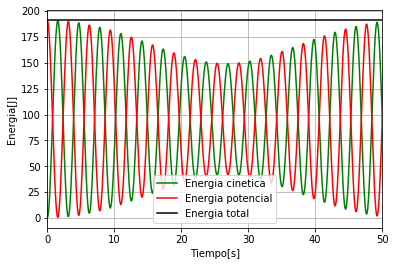

In [18]:
from pylab import plot,legend,xlabel,ylabel 
ki=((1/2)*m*(l*thetaIp)**2)+(1/2)*m*(l*phiIp)**2
ui=(m*g*l/2)*((thetaI**2)+(phiI**2))+((k*(l)**2)/2)*(thetaI-phiI)**2
KIV=ki*np.ones((n,1))#valor inicial de la energia cinetica
UIV=ui*np.ones((n,1))#valor inical de la energia potencial 
K=((m/2)*(l*sol[:,1])**2)+(m/2)*(l*sol[:,3])**2#energia cinetica
U=(m*g*l/2)*((sol[:,0]**2)+(sol[:,2]**2))+((k*(l)**2)/2)*(sol[:,0]-sol[:,2])**2#energia potencial
E=K+U#energia total
KdTe=(l**2)*(m*sol[:,1])#derivada parcial de la energia cinetica con respecto a theta punto
KdPhi=(l**2)*(m*sol[:,3])#derivada parcial de la energia cinetica con respecto a phi
UdTe=(k*(2*sol[:,0]-2*sol[:,2])*l**2)/2 + g*m*sol[:,0]*l#derivada parcial de la energia potencial con respecto a theta
UdPhi=g*l*m*sol[:,2]-(k*l**2*(2*sol[:,0]-2*sol[:,2]))/2#derivada parcial de la energia potencial con respecto a phi

Paso=(tf/n)
ERT=[]
for i in range (0,n):
    ERTHe=sqrt(((Paso*KdTe[i])**2)+((Paso*KdPhi[i])**2))
    ERT.append(ERTHe)
#plt.plot(t,ERT,'b')
#plt.plot(t,KIV,'r')
plt.plot(t,K,'g',label='Energia cinetica')
plt.grid('on')
plt.plot(t,U,'r',label='Energia potencial')
plt.plot(t,E,'k',label='Energia total')
plt.grid('on')
#plt.plot(t,UIV,'b')
plt.xlim(0,50)
xlabel('Tiempo[s]')
ylabel('Energia[J]')
legend(loc='higher left')